In [1]:
%run "./0_titanic_utils.ipynb"

In [2]:
train_df = read_clean_titanic('./data/train.csv')
test_df = read_clean_titanic('./data/test.csv')

In [3]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

In [4]:
feature_cols = ['Pclass', 'Embarked_C', 'Embarked_Q', 'Embarked_S', 'is_female',
   'is_age_master', 'is_age_mister', 'is_age_miss', 'is_age_misses', 'is_family',
   'is_parent', 'is_child', 
   'age_cat_master', 'age_cat_miss', 'age_cat_misses', 'age_cat_mister']

# X_train = train_df[feature_cols]
# y_train = train_df['Survived']

# X_test = test_df[feature_cols]
# y_test = test_df['Survived']

X = train_df[feature_cols]
y = train_df['Survived']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)


In [5]:
logreg = LogisticRegression()
logreg.fit(X, y)
y_pred = logreg.predict(X_test)

print(f'{logreg.score(X_test, y_test):.2f} - accuracy of logistic regression classifier on test set')

0.79 - accuracy of logistic regression classifier on test set


In [6]:
from sklearn import metrics
cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
cnf_matrix

array([[131,  26],
       [ 29,  81]])

<AxesSubplot:>

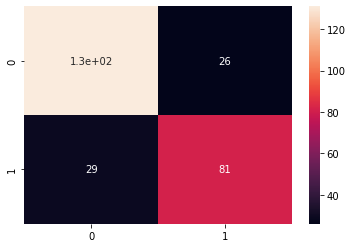

In [7]:
sns.heatmap(cnf_matrix, annot=True)

<AxesSubplot:>

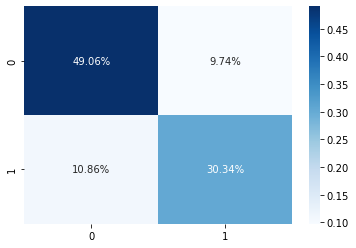

In [8]:
sns.heatmap(cnf_matrix/np.sum(cnf_matrix), annot=True, fmt='.2%', cmap='Blues')

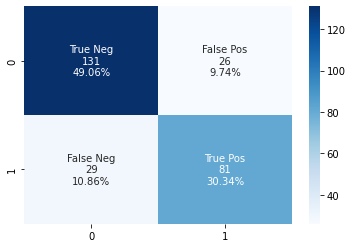

In [9]:
confusion_heat_map(cnf_matrix)

In [10]:
cnf_matrix/np.sum(cnf_matrix)

array([[0.4906367 , 0.09737828],
       [0.10861423, 0.30337079]])

In [11]:
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
print("Precision:",metrics.precision_score(y_test, y_pred))
print("Recall:",metrics.recall_score(y_test, y_pred))
print("Recall:",metrics.classification_report(y_test, y_pred))

Accuracy: 0.7940074906367042
Precision: 0.7570093457943925
Recall: 0.7363636363636363
Recall:               precision    recall  f1-score   support

           0       0.82      0.83      0.83       157
           1       0.76      0.74      0.75       110

    accuracy                           0.79       267
   macro avg       0.79      0.79      0.79       267
weighted avg       0.79      0.79      0.79       267



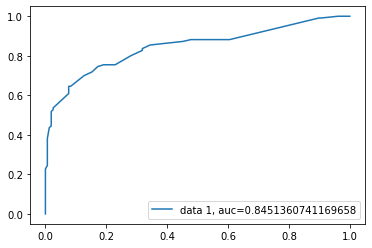

In [12]:
y_pred_proba = logreg.predict_proba(X_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)
auc = metrics.roc_auc_score(y_test, y_pred_proba)
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.legend(loc=4)
plt.show()

In [13]:
round_age = train_df 
round_age.Age = round_age.Age.round()
round_age.head()
round_age.groupby('Age').mean()

,PassengerId,Survived,Pclass,Fare,is_female,is_age_infant,is_age_child,is_age_teen,is_age_young_adult,is_age_adult,...,is_child,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S,age_cat_master,age_cat_miss,age_cat_misses,age_cat_mister
Age,,,,,,,,,,,,,,,,,,,,,
0.0,804.000000,1.000000,3.000000,8.516700,0.000000,1.000000,0.000000,0.0,0.0,0.0,...,1.0,0.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.0,0.0
1.0,461.230769,0.846154,2.461538,35.566023,0.307692,0.461538,0.538462,0.0,0.0,0.0,...,1.0,0.307692,0.692308,0.307692,0.000000,0.692308,0.692308,0.307692,0.0,0.0
2.0,346.900000,0.300000,2.600000,37.536250,0.600000,0.000000,1.000000,0.0,0.0,0.0,...,1.0,0.600000,0.400000,0.000000,0.100000,0.900000,0.400000,0.600000,0.0,0.0
3.0,272.000000,0.833333,2.500000,25.781950,0.333333,0.000000,1.000000,0.0,0.0,0.0,...,1.0,0.333333,0.666667,0.166667,0.000000,0.833333,0.666667,0.333333,0.0,0.0
4.0,466.100000,0.700000,2.600000,29.543330,0.500000,0.000000,1.000000,0.0,0.0,0.0,...,1.0,0.500000,0.500000,0.100000,0.100000,0.800000,0.500000,0.500000,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
66.0,34.000000,0.000000,2.000000,10.500000,0.000000,0.000000,0.000000,0.0,0.0,0.0,...,0.0,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.0,1.0
70.0,512.000000,0.000000,2.000000,29.750000,0.000000,0.000000,0.000000,0.0,0.0,0.0,...,0.0,0.000000,1.000000,0.000000,0.333333,0.666667,0.000000,0.000000,0.0,1.0
71.0,295.500000,0.000000,1.000000,42.079200,0.000000,0.000000,0.000000,0.0,0.0,0.0,...,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.0,1.0


In [14]:
round_age.groupby('Pclass').mean()[['Survived','Age','Fare']]

,Survived,Age,Fare
Pclass,,,
1,0.626168,37.453271,84.193516
2,0.472826,29.940217,20.662183
3,0.242363,26.397149,13.675550


## Attempting By Hand

The `mister` category is so predictive I'd like to know what the scores would be if our model was "is mister"

In [15]:
train_df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Age', 'Fare', 'is_female',
       'is_age_infant', 'is_age_child', 'is_age_teen', 'is_age_young_adult',
       'is_age_adult', 'is_age_old_adult', 'is_age_elderly', 'is_age_master',
       'is_age_mister', 'is_age_miss', 'is_age_misses', 'is_family',
       'is_parent', 'is_child', 'Sex_female', 'Sex_male', 'Embarked_C',
       'Embarked_Q', 'Embarked_S', 'age_cat_master', 'age_cat_miss',
       'age_cat_misses', 'age_cat_mister'],
      dtype='object')

In [18]:
train_df[train_df["age_cat_mister"] == True]

,PassengerId,Survived,Pclass,Age,Fare,is_female,is_age_infant,is_age_child,is_age_teen,is_age_young_adult,...,is_child,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S,age_cat_master,age_cat_miss,age_cat_misses,age_cat_mister
0,1,0,3,22.0,7.2500,0,0,0,0,1,...,0,0,1,0,0,1,0,0,0,1
4,5,0,3,35.0,8.0500,0,0,0,0,0,...,0,0,1,0,0,1,0,0,0,1
5,6,0,3,33.0,8.4583,0,0,0,0,0,...,0,0,1,0,1,0,0,0,0,1
6,7,0,1,54.0,51.8625,0,0,0,0,0,...,0,0,1,0,0,1,0,0,0,1
12,13,0,3,20.0,8.0500,0,0,0,0,1,...,0,0,1,0,0,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
883,884,0,2,28.0,10.5000,0,0,0,0,0,...,0,0,1,0,0,1,0,0,0,1
884,885,0,3,25.0,7.0500,0,0,0,0,1,...,0,0,1,0,0,1,0,0,0,1
886,887,0,2,27.0,13.0000,0,0,0,0,0,...,0,0,1,0,0,1,0,0,0,1
889,890,1,1,26.0,30.0000,0,0,0,0,1,...,0,0,1,1,0,0,0,0,0,1


In [24]:
misters = train_df[train_df["age_cat_mister"] == 1]
misters_alive = misters[misters["Survived"] == 1]
misters_dead = misters[misters["Survived"] == 0]



print(f"misters_count: {len(misters)}")
print(f"misters_count_alive: {len(misters_alive)}")
print(f"misters_count_dead: {len(misters_dead)}")
print(f"misters survival: {round(len(misters_alive)/len(misters),2) * 100}")

misters_count: 538
misters_count_alive: 87
misters_count_dead: 451
misters survival: 16.0


<AxesSubplot:>

<Figure size 1000x500 with 0 Axes>

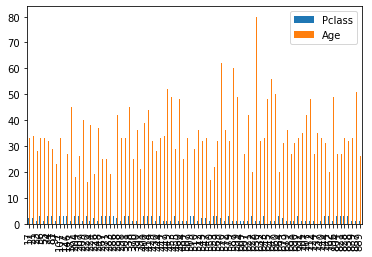

In [29]:
plt.figure(figsize=(10,5),dpi=100)

misters_alive[["Pclass", "Age"]].plot.bar()

In [37]:
!pip install plotly

In [31]:
!pip install cufflinks

     |████████████████████████████████| 81 kB 2.8 MB/s eta 0:00:01
     |████████████████████████████████| 27.7 MB 8.8 MB/s eta 0:00:011
  Created wheel for cufflinks: filename=cufflinks-0.17.3-py3-none-any.whl size=67917 sha256=3990dde36eb9f9f512b0023134fad4cdd17d3bc5886820d945302023a8551896
  Stored in directory: /Users/bladnman/Library/Caches/pip/wheels/29/b4/f8/2fd2206eeeba6ccad8167e4e8894b8c4ec27bf1342037fd136
Successfully built cufflinks


In [32]:
import cufflinks as cf
# Going offline means you plot only locally, and dont need a plotly username / password
cf.go_offline()

In [35]:
# Create an interactive bar chart:
misters_alive[["Pclass", "Age"]].iplot(
    x='Age',
    y='Pclass',
    kind='scatter'
)

In [38]:
import plotly.express as px
fig = px.scatter(misters_alive, x="Age", y="Pclass")
fig.show()